In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [22]:
X = df.drop({'class'}, axis=1)
y = df['class']

In [29]:
rfc = RandomForestClassifier(random_state=0)

* n_estimators: от 10 до 50 с шагом 10
* max_depth: от 1 до 12 с шагом 2
* min_samples_leaf: от 1 до 7
* min_samples_split: от 2 до 9 с шагом 2

In [30]:
params = {'n_estimators': range(10, 51, 10),
          'max_depth': range(1, 13, 2),
          'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 9, 2)}

In [31]:
clf = GridSearchCV(rfc, params, cv=3, n_jobs=-1)

In [32]:
clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [33]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
rfc_best = RandomForestClassifier(max_depth = 9,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 10)

In [37]:
rfc_best.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10)

<AxesSubplot:>

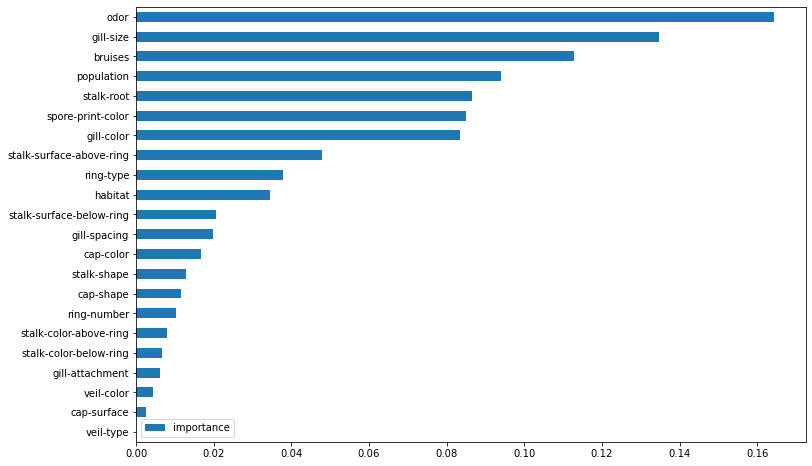

In [39]:
imp = pd.DataFrame(rfc_best.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [40]:
df_test = pd.read_csv('testing_mush.csv')
df_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [41]:
X_test = df_test

In [42]:
pred  = rfc_best.predict(X_test)

In [48]:
pred = pd.DataFrame(pred)

In [50]:
pred.value_counts() # 0 - съедобные грибы

0    1055
1     976
dtype: int64

In [51]:
df_true = pd.read_csv('testing_y_mush.csv')
df_true.head()

,class
0,0
1,0
2,1
3,1
4,1


In [55]:
pred_true = df_true

In [56]:
conf_matrix = confusion_matrix(pred, pred_true)

<AxesSubplot:>

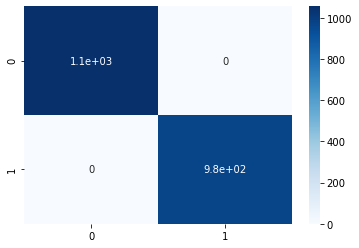

In [59]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')